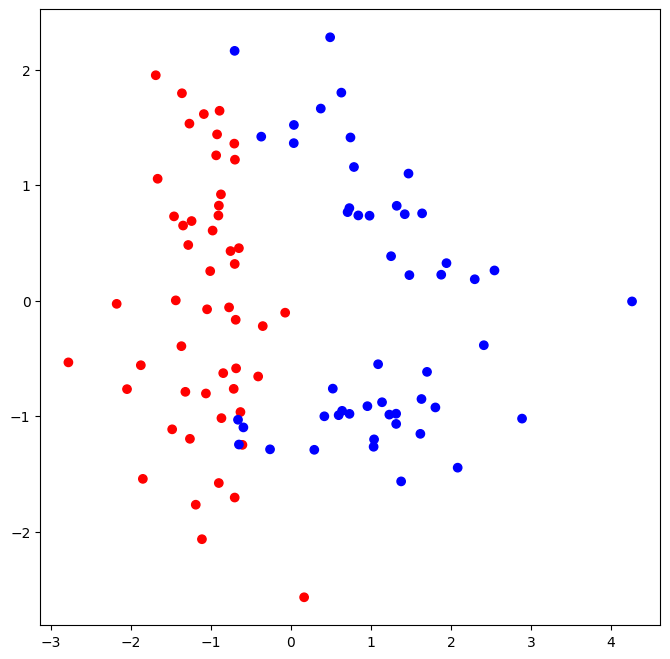

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=10)

colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()


In [33]:
X, y = classes

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (70, 2)
Размер тестовой выборки: (30, 2)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
classifier_logistic = LogisticRegression(random_state=42)
classifier_logistic.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [39]:
y_pred_logistic = classifier_logistic.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(accuracy_logistic)

0.9


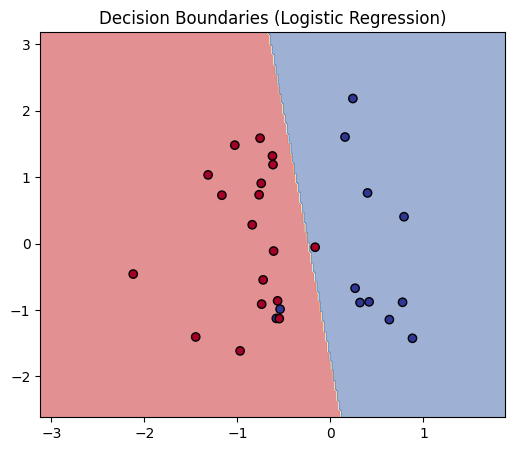

In [43]:
def plot_decision_boundary(X, y, model, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_title(title)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_decision_boundary(X_test_scaled, y_test, classifier_logistic, ax, "Logistic Regression")

plt.show()
